## Holiday Package Prediction
## 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [11]:
## Check missing values
features_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [12]:
df[features_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [13]:
df.Age.fillna(df.Age.median(), inplace=True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [14]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [15]:
df.drop('CustomerID', inplace=True, axis=1)

## Feature Engineering

In [16]:
df['TotalVisting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True, axis=1)

In [17]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [18]:
## getting all the numerical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("total numerical features : ", len(num_features))

total numerical features :  12


In [19]:
## getting all the categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("total categorical features : ", len(cat_features))

total categorical features :  6


In [20]:
## getting all the discrete features
dis_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print("total discrete features : ", len(dis_features))

total discrete features :  9


In [21]:
## getting all the continuous features
cont_features = [feature for feature in num_features if len(df[feature].unique()) > 25]
print("total continuous features : ", len(cont_features))

total continuous features :  3


## Train Test Split and Model Training

In [22]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [25]:
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [27]:
## create column transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop='first')
st = StandardScaler()

cat_features = X.select_dtypes(include = 'object').columns
num_features = X.select_dtypes(exclude = 'object').columns

pre = ColumnTransformer(
    [
        ('OneHotEncoder', ohe, cat_features),
        ('StandardScaler', st, num_features)
    ]
)

In [28]:
X_train = pre.fit_transform(X_train)
X_test = pre.transform(X_test)

## Random Forest Training

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay, \
                            precision_score, recall_score, roc_auc_score, roc_curve 

In [35]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training performance
    acc = accuracy_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    ps = precision_score(y_train, y_train_pred)
    rs = recall_score(y_train, y_train_pred)
    ras = roc_auc_score(y_train, y_train_pred)

    # Testing performance
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    ps_test = precision_score(y_test, y_test_pred)
    rs_test = recall_score(y_test, y_test_pred)
    ras_test = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for training set')
    print('- Accuracy: {:.4f}'.format(acc))
    print('- F1 score: {:.4f}'.format(f1))
    print('- Precision Score: {:.4f}'.format(ps))
    print('- Recall Score: {:.4f}'.format(rs))
    print('- Roc Auc Score: {:.4f}'.format(ras))

    print('-------------------------------------------')

    print('Model performance for testing set')
    print('- Accuracy: {:.4f}'.format(acc_test))
    print('- F1 score: {:.4f}'.format(f1_test))
    print('- Precision Score: {:.4f}'.format(ps_test))
    print('- Recall Score: {:.4f}'.format(rs_test))
    print('- Roc Auc Score: {:.4f}'.format(ras_test))

    print("=" * 35)
    print('\n')

Random Forest
Model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------
Model performance for testing set
- Accuracy: 0.9243
- F1 score: 0.7658
- Precision Score: 0.9680
- Recall Score: 0.6335
- Roc Auc Score: 0.8142


Decision Tree
Model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------
Model performance for testing set
- Accuracy: 0.9162
- F1 score: 0.7819
- Precision Score: 0.7946
- Recall Score: 0.7696
- Roc Auc Score: 0.8607


Logistic Regression
Model performance for training set
- Accuracy: 0.8460
- F1 score: 0.4234
- Precision Score: 0.7016
- Recall Score: 0.3032
- Roc Auc Score: 0.6368
-------------------------------------------
Model performance for testing set
- Accuracy: 0.8364
- F1 score: 0.4118
- Precision Scor

In [36]:
rf_params = {
    'max_depth': [None, 5, 8, 10, 15],
    'max_features': [5, 7, 'auto', 8],
    'min_samples_split': [2, 8, 15, 20],
    'n_estimators': [100, 200, 500, 1000]
}

In [37]:
## model lists for hyperparameter turing
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params)
]

In [40]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=2, n_jobs=-1)
    
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

    for model_name in model_params:
        print(f"---------------- Best Params for {model_name} -------------------")
        print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [41]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split= 2, max_features= 8, max_depth= None),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training performance
    acc = accuracy_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    ps = precision_score(y_train, y_train_pred)
    rs = recall_score(y_train, y_train_pred)
    ras = roc_auc_score(y_train, y_train_pred)

    # Testing performance
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    ps_test = precision_score(y_test, y_test_pred)
    rs_test = recall_score(y_test, y_test_pred)
    ras_test = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for training set')
    print('- Accuracy: {:.4f}'.format(acc))
    print('- F1 score: {:.4f}'.format(f1))
    print('- Precision Score: {:.4f}'.format(ps))
    print('- Recall Score: {:.4f}'.format(rs))
    print('- Roc Auc Score: {:.4f}'.format(ras))

    print('-------------------------------------------')

    print('Model performance for testing set')
    print('- Accuracy: {:.4f}'.format(acc_test))
    print('- F1 score: {:.4f}'.format(f1_test))
    print('- Precision Score: {:.4f}'.format(ps_test))
    print('- Recall Score: {:.4f}'.format(rs_test))
    print('- Roc Auc Score: {:.4f}'.format(ras_test))

    print("=" * 35)
    print('\n')

Random Forest
Model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------
Model performance for testing set
- Accuracy: 0.9346
- F1 score: 0.8037
- Precision Score: 0.9704
- Recall Score: 0.6859
- Roc Auc Score: 0.8404


[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=500; total time=   2.9s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=1000; total time=   5.0s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=500; total time=   2.7s
[CV] END max_depth=None, max_features=8, min_samples_split=2,

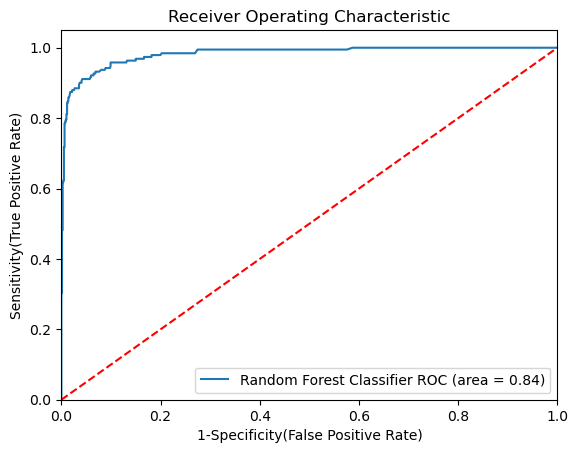

In [42]:
## Plot ROC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# add models to the list that you want to view on the ROC curve
auc_models = [
    {
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000, min_samples_split= 2, max_features= 8, max_depth= None),
    'auc': 0.8404
    }
]

#create a loop through all model
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    # compute false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    #Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 